DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# DATA ORIGINAL

df_og = pd.read_csv('NYC_TLC_Trip_Record.csv')
df_og

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/455639729.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv('NYC_TLC_Trip_Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [3]:
df_copy = df_og.copy()
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


DATETIME COLUMN ANALYSIS

In [4]:
# TO DATETIME DATA TYPE

df_copy['lpep_pickup_datetime'] = pd.to_datetime(df_copy['lpep_pickup_datetime'], errors='coerce')
df_copy['lpep_dropoff_datetime'] = pd.to_datetime(df_copy['lpep_dropoff_datetime'], errors='coerce')

In [5]:
# FIND MISSING DATA (NA)

missing_pickup = df_copy['lpep_pickup_datetime'].isna().sum()
missing_dropoff = df_copy['lpep_dropoff_datetime'].isna().sum()

print(f"Missing pickup datetime: {missing_pickup}")
print(f"Missing dropoff datetime: {missing_dropoff}")

Missing pickup datetime: 0
Missing dropoff datetime: 0


In [6]:
# FILTERING DROP OFF TIME LOWER THAN PICK UP TIME, IF ANY

df_copy = df_copy[df_copy['lpep_dropoff_datetime'] > df_copy['lpep_pickup_datetime']]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [7]:
# DATA NOT IN RANGE 01-01-2023 AND 31-01-2023

check2 = df_copy[
    (df_copy['lpep_dropoff_datetime'] < '2023-01-01') | 
    (df_copy['lpep_dropoff_datetime'] > '2023-01-31 23:59:59')
][['lpep_dropoff_datetime']].count()
check2

lpep_dropoff_datetime    19
dtype: int64

In [8]:
# REMOVE DATA NOT IN RANGE 01-01-2023 AND 31-01-2023
# TO MAKE DATA IN ONE MONTH

df_copy = df_copy[(df_copy['lpep_dropoff_datetime'] >= '2023-01-01 00:00:00') & (df_copy['lpep_dropoff_datetime'] <= '2023-01-31 23:59:59')]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,0.0,0.0,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN


FARE-RELATED COLUMN

In [9]:
# CHECK DATA TYPE
df_copy['fare_amount'].dtype

dtype('float64')

In [10]:
# MISSING FARE AMOUNT

missing_fare = df_copy['fare_amount'].isna().sum()
print(f"Missing trip distance: {missing_fare}")

Missing trip distance: 0


In [11]:
df_copy['fare_amount'].describe()

count    68131.000000
mean        16.606389
std         13.471886
min        -70.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

In [12]:
# FIND FARE VALUES BELOW 0

check = df_copy[(df_copy['fare_amount']<= 0) | (df_copy['total_amount']<=0)][['payment_type','fare_amount','total_amount']]
check 

,payment_type,fare_amount,total_amount
662,3.0,-3.00,-4.50
898,4.0,-3.00,-4.50
1317,3.0,-8.60,-11.10
1581,1.0,0.00,0.00
1686,4.0,-4.50,-5.30
...,...,...,...
64376,NaN,-27.96,-23.96
64487,NaN,-43.54,-41.78
65108,NaN,-17.38,-16.12
66459,NaN,-35.01,-29.15


In [13]:
# CHANGE FARE AMOUNT AND TOTAL AMOUNT TO 0 FOR PAYMENT TYPE 3 (3 = NO CHARGE)

df_copy.loc[df_copy['payment_type'] == 3.0, ['fare_amount', 'total_amount']] = 0
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,0.0,0.0,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN


In [14]:
# CHECK FARE VALUE = 0 OR BELOW FOR PAYMENT TYPE OTHER THAN 3

check3 = df_copy[
    (df_copy['payment_type'] != 3) & 
    ((df_copy['fare_amount'] <= 0) | (df_copy['total_amount'] <= 0))
][['payment_type','fare_amount','total_amount']]
check3

,payment_type,fare_amount,total_amount
898,4.0,-3.00,-4.50
1581,1.0,0.00,0.00
1686,4.0,-4.50,-5.30
1919,4.0,-3.00,-4.50
2130,1.0,0.00,0.00
...,...,...,...
64376,NaN,-27.96,-23.96
64487,NaN,-43.54,-41.78
65108,NaN,-17.38,-16.12
66459,NaN,-35.01,-29.15


In [15]:
# REMOVE FARE AMOUNT AND TOTAL AMOUNT WITH 0 OR < 0 VALUE FOR PAYMENT TYPE OTHER THAN 3 

df_copy = df_copy[
    (df_copy['payment_type'] == 3) | 
    ((df_copy['fare_amount'] > 0) & (df_copy['total_amount'] > 0))
]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,0.0,0.0,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN


In [16]:
# CHECK FARE VALUE = 0 OR BELOW FOR PAYMENT TYPE OTHER THAN 3

check4 = df_copy[
    (df_copy['payment_type'] != 3) & 
    ((df_copy['fare_amount'] <= 0) | (df_copy['total_amount'] <= 0))
][['payment_type','fare_amount','total_amount']]
check4

,payment_type,fare_amount,total_amount


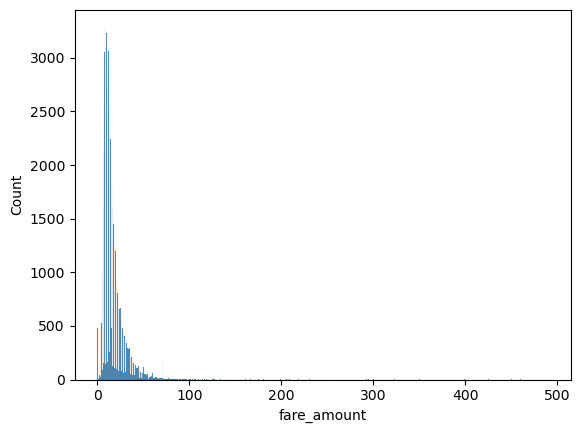

In [17]:
# DISTRIBUTION

sns.histplot(
    data=df_copy,
    x='fare_amount'
)
plt.show()

# LEFT SKEWED = NOT NORMALLY DISTRIBUTED

In [18]:
# DISTRIBUTION TEST FOR FARE AMOUNT
# H0 = DATA TERDISTRIBUSI NORMAL
# H1 = DATA TIDAK TERDISTRIBUSI NORMAL

from scipy.stats import shapiro
stat, pval = shapiro(df_copy['fare_amount'])

print(stat, pval)

# P-VALUE = 4.18e-140
# P-VALUE < 0.05, H0 DITOLAK = DATA TIDAK TERDISTRIBUSI NORMAL

0.6403413891391718 4.1875713499115878e-140


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68016.
  res = hypotest_fun_out(*samples, **kwds)


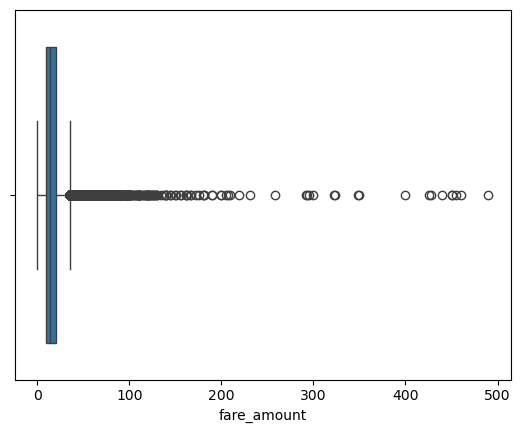

In [19]:
# OUTLIER

sns.boxplot(
    data=df_copy,
    x='fare_amount'
)
plt.show()

In [20]:
# CHECK OUTLIER

Q1 = df_copy['fare_amount'].quantile(0.25)
Q3 = df_copy['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - (1.5*IQR)
max = Q3 + (1.5*IQR)

print(min, max)

-6.449999999999999 35.55


TRIP DISTANCE COLUMN

In [21]:
# CHECK DATA TYPES
df_copy['trip_distance'].dtype

dtype('float64')

In [22]:
# MISSING VALUES
missing_trip = df_copy['trip_distance'].isna().sum()
print(f"Missing trip distance: {missing_trip}")

Missing trip distance: 0


In [23]:
df_copy['trip_distance'].describe()

count     68016.000000
mean          8.134240
std         585.943947
min           0.000000
25%           1.120000
50%           1.850000
75%           3.220000
max      120098.840000
Name: trip_distance, dtype: float64

In [24]:
# DISTRIBUTION TEST FOR FARE AMOUNT
# H0 = DATA TERDISTRIBUSI NORMAL
# H1 = DATA TIDAK TERDISTRIBUSI NORMAL

from scipy.stats import shapiro
stat, pval = shapiro(df_copy['trip_distance'])

print(stat, pval)

# P-VALUE = 5.15e-173
# P-VALUE < 0.05, H0 DITOLAK = DATA TIDAK TERDISTRIBUSI NORMAL

0.0017353734423701805 5.155678216321435e-173


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68016.
  res = hypotest_fun_out(*samples, **kwds)


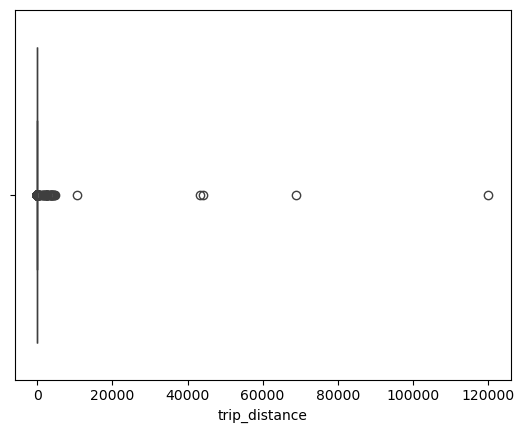

In [25]:
# CHECK OUTLIER
# NOT NORMALLY DISTRIBUTED

sns.boxplot(
    data=df_copy,
    x='trip_distance'
)
plt.show()

In [26]:
# CHECK OUTLIERS

Q1 = df_copy['trip_distance'].quantile(0.25)
Q3 = df_copy['trip_distance'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - (1.5*IQR)
max = Q3 + (1.5*IQR)

print(min, max)

-2.0300000000000002 6.370000000000001


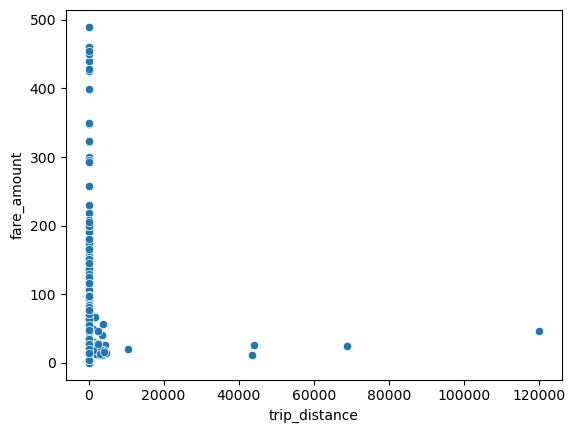

In [27]:
# COMPARING TRIP DISTANCE & FARE AMOUNTS

sns.scatterplot(
    data=df_copy,
    x='trip_distance',
    y='fare_amount'
)
plt.show()

# THERE ARE SOME INCONSISTENCY IN THE FARE AMOUNT & TRIP DISTANCE SUCH AS, 
# LOW DISTANCE - HIGH FARE AND HIGH DISTANCE - LOW FARE

In [28]:
# CALCULATE FARE PER MILE

df_copy['fare_per_mile'] = round(df_copy['fare_amount'] / df_copy['trip_distance'],2)
df_copy['fare_per_mile'].describe()

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/1994649436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['fare_per_mile'] = round(df_copy['fare_amount'] / df_copy['trip_distance'],2)


count    67851.00
mean          inf
std           NaN
min          0.00
25%          5.57
50%          6.70
75%          8.23
max           inf
Name: fare_per_mile, dtype: float64

In [29]:
# OUTLIERS IN FARE AMOUNT

Q1 = df_copy['fare_per_mile'].quantile(0.25)
Q3 = df_copy['fare_per_mile'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - (1.5*IQR)
max = Q3 + (1.5*IQR)

print(min, max)

1.58 12.22


In [30]:
# REMOVING INCONSISTENCY IN FARE & DISTANCE

df_copy = df_copy[(df_copy['fare_per_mile'] >= min) & (df_copy['fare_per_mile'] <= max)]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,5.78
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,5.91
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.45
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75,6.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,0.0,3.88,0.0,NaN,1.0,23.28,NaN,NaN,NaN,4.73
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,0.0,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN,6.47
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.0,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN,5.29
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,2.06


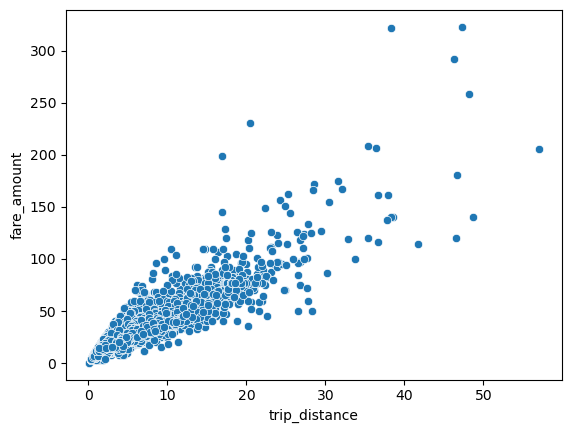

In [31]:
# COMPARISON BETWEEN FARE & DISTANCE AFTER INCONSISTENCY REMOVAL

sns.scatterplot(
    data=df_copy,
    x='trip_distance',
    y='fare_amount'
)
plt.show()

REMOVING OUTLIERS AND ANALYZING DISTRIBUTION IN FARE AMOUNT AND TRIP DISTANCE

In [32]:
# OUTLIERS IN FARE AMOUNT

Q1 = df_copy['fare_amount'].quantile(0.25)
Q3 = df_copy['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - (1.5*IQR)
max = Q3 + (1.5*IQR)

print(min, max)

-6.449999999999999 35.55


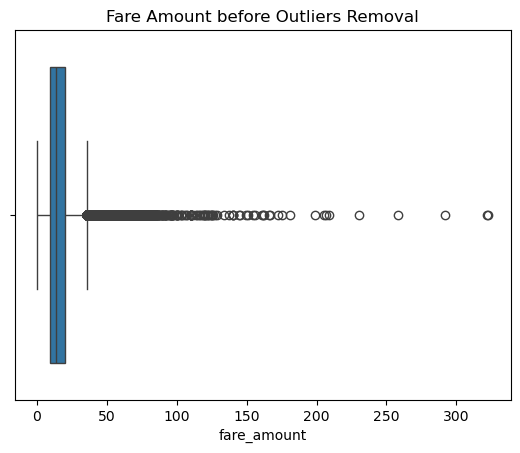

In [33]:
# OUTLIERS IN FARE AMOUNT

sns.boxplot(
    data=df_copy,
    x='fare_amount'
)
plt.title("Fare Amount before Outliers Removal")
plt.show()

In [34]:
# REMOVING OUTLIERS IN FARE AMOUNT
df_copy = df_copy[(df_copy['fare_amount'] >= 0) & (df_copy['fare_amount'] <= max)]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,5.78
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,5.91
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.45
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75,6.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,0.0,3.88,0.0,NaN,1.0,23.28,NaN,NaN,NaN,4.73
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,0.0,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN,6.47
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.0,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN,5.29
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,2.06


In [35]:
# CHECK FARE_AMOUNT
df_copy['fare_amount'].describe()

count    58142.000000
mean        14.515004
std          6.896964
min          0.300000
25%          9.300000
50%         12.800000
75%         18.400000
max         35.550000
Name: fare_amount, dtype: float64

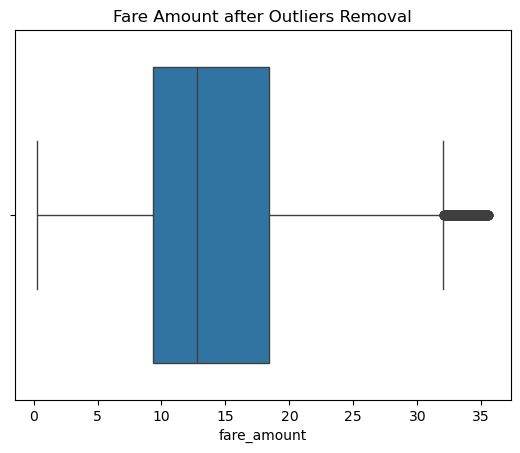

In [36]:
sns.boxplot(
    data=df_copy,
    x='fare_amount'
)
plt.title("Fare Amount after Outliers Removal")
plt.show()

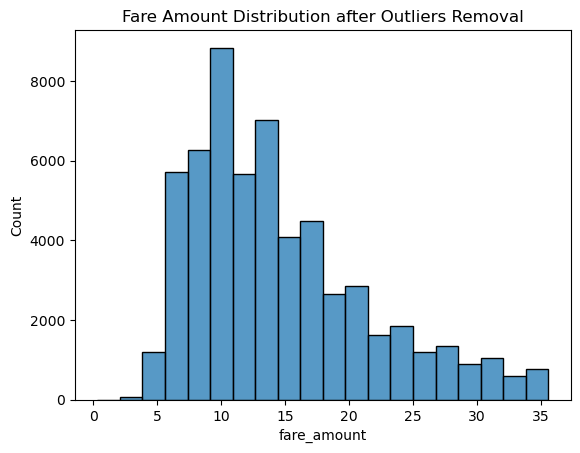

In [37]:
sns.histplot(
    data=df_copy,
    x='fare_amount',
    bins=20
)
plt.title("Fare Amount Distribution after Outliers Removal")
plt.show()

In [38]:
# DISTRIBUTION TEST 2
stat, pval = shapiro(df_copy['fare_amount'])
print(stat, pval)

# PVALUE = 4.60e-95
# STILL NOT NORMALLY DISTRIBUTED

0.9187087749824971 4.602332832125081e-95


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58142.
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
# LOG TRANSFORMATION

df_copy['fare_amount_log'] = np.log(df_copy['fare_amount'])
df_copy

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/1466221701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['fare_amount_log'] = np.log(df_copy['fare_amount'])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,5.78,2.701361
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,5.91,2.370244
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.00,1.871802
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.45,1.791759
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75,6.37,2.873565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,3.88,0.0,NaN,1.0,23.28,NaN,NaN,NaN,4.73,2.750471
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,3.31,0.0,NaN,1.0,21.68,NaN,NaN,NaN,6.47,2.682390
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,1.25,0.0,NaN,0.3,25.02,NaN,NaN,NaN,5.29,3.031099
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,2.06,1.483875


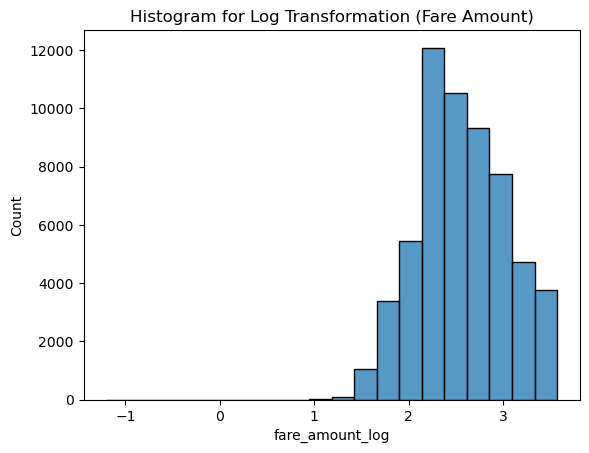

In [40]:
# LOG TRANSFORMATION HISTPLOT

sns.histplot(
    data=df_copy,
    x='fare_amount_log',
    bins=20
)
plt.title('Histogram for Log Transformation (Fare Amount)')
plt.show()

In [41]:
# DISTRIBUTION TEST LOG TRANSFORMATION
stat, pval = shapiro(df_copy['fare_amount_log'])
print(stat, pval)

# PVALUE = 2.5e-51
# STILL NOT NORMALLY DISTRIBUTED

0.9892662475272594 2.5781799066549143e-51


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58142.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
# SQRT TEST FARE AMOUNT

df_copy['fare_amount_sqrt'] = np.sqrt(df_copy['fare_amount'])
df_copy

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/2893905994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['fare_amount_sqrt'] = np.sqrt(df_copy['fare_amount'])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,5.78,2.701361,3.860052
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,5.91,2.370244,3.271085
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.00,1.871802,2.549510
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.45,1.791759,2.449490
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.0,NaN,1.0,22.95,2.0,1.0,2.75,6.37,2.873565,4.207137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,0.0,NaN,1.0,23.28,NaN,NaN,NaN,4.73,2.750471,3.956008
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,0.0,NaN,1.0,21.68,NaN,NaN,NaN,6.47,2.682390,3.823611
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.0,NaN,0.3,25.02,NaN,NaN,NaN,5.29,3.031099,4.551923
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,0.0,NaN,1.0,5.41,NaN,NaN,NaN,2.06,1.483875,2.100000


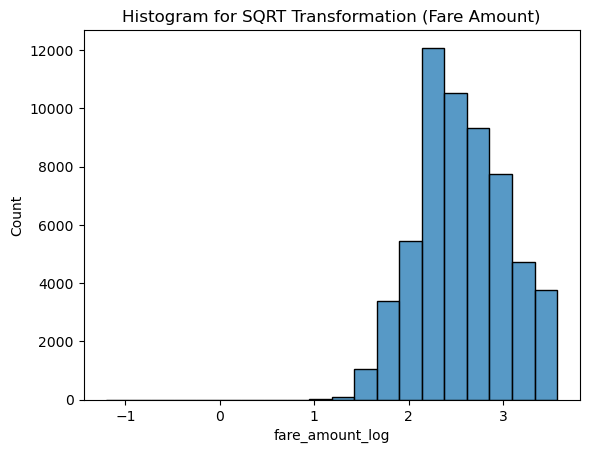

In [43]:
# SQRT TRANSFORMATION HISTPLOT

sns.histplot(
    data=df_copy,
    x='fare_amount_log',
    bins=20
)
plt.title('Histogram for SQRT Transformation (Fare Amount)')
plt.show()

In [44]:
# DISTRIBUTION TEST SQRT TRANSFORMATION
stat, pval = shapiro(df_copy['fare_amount_sqrt'])
print(stat, pval)

# PVALUE = 1.12e-73
# STILL NOT NORMALLY DISTRIBUTED
# USE NON PARAMETRIC TEST

0.9673203082884869 1.126884608203704e-73


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58142.
  res = hypotest_fun_out(*samples, **kwds)


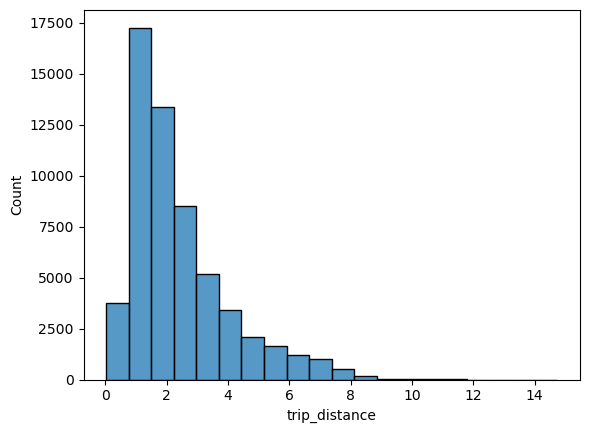

In [45]:
# IDENTIFYING OUTLIERS & DISTRIBUTION FROM TRIP DISTANCE

sns.histplot(
    data=df_copy,
    x='trip_distance',
    bins=20
)
plt.show()

In [46]:
# DISTRIBUTION TEST FOR TRIP DISTANCE

stat, pval = shapiro(df_copy['trip_distance'])
print(stat, pval)

# PVALUE = 4.79e-109
# DATA IS NOT NORMALLY DISTRIBUTED

0.8605299985978572 4.79901931605126e-109


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58142.
  res = hypotest_fun_out(*samples, **kwds)


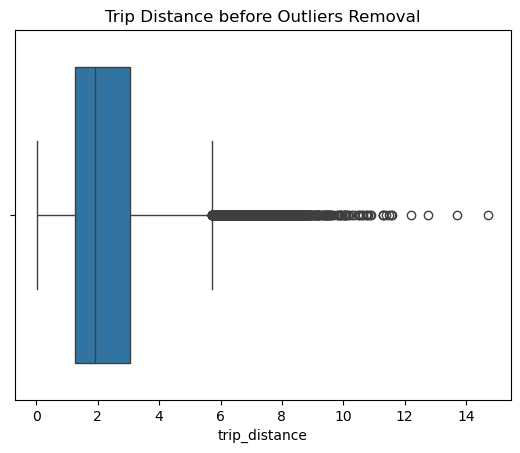

In [47]:
# ANALYZING OUTLIERS

sns.boxplot(
    data=df_copy,
    x='trip_distance'
)
plt.title("Trip Distance before Outliers Removal")
plt.show()

In [48]:
# IDENTIFYING OUTLIERS FROM TRIP DISTANCE 
Q1 = df_copy['trip_distance'].quantile(0.25)
Q3 = df_copy['trip_distance'].quantile(0.75)

IQR = Q3 - Q1

min = Q1 - (1.5*IQR)
max = Q3 + (1.5*IQR)

print(min, max)

-1.4 5.72


In [49]:
# REMOVING OUTLIERS FROM TRIP DISTANCE
df_copy = df_copy[(df_copy['trip_distance'] > min) & (df_copy['trip_distance'] <= max)]
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,5.78,2.701361,3.860052
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,5.91,2.370244,3.271085
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.00,1.871802,2.549510
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.45,1.791759,2.449490
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.0,NaN,1.0,22.95,2.0,1.0,2.75,6.37,2.873565,4.207137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,0.0,NaN,1.0,23.28,NaN,NaN,NaN,4.73,2.750471,3.956008
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,0.0,NaN,1.0,21.68,NaN,NaN,NaN,6.47,2.682390,3.823611
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.0,NaN,0.3,25.02,NaN,NaN,NaN,5.29,3.031099,4.551923
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,0.0,NaN,1.0,5.41,NaN,NaN,NaN,2.06,1.483875,2.100000


In [50]:
df_copy['trip_distance'].describe()

count    54791.000000
mean         2.126873
std          1.191684
min          0.030000
25%          1.230000
50%          1.810000
75%          2.780000
max          5.720000
Name: trip_distance, dtype: float64

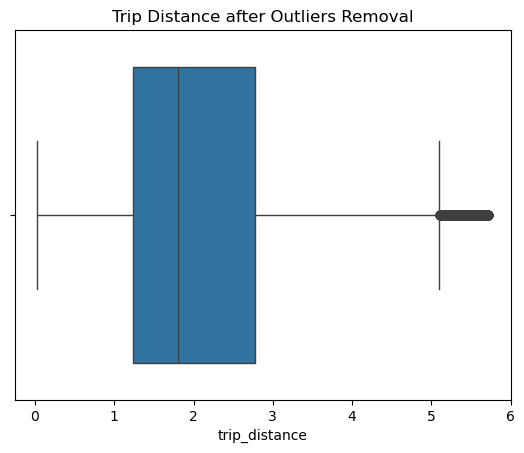

In [51]:
sns.boxplot(
    data=df_copy,
    x='trip_distance'
)
plt.title('Trip Distance after Outliers Removal')
plt.show()

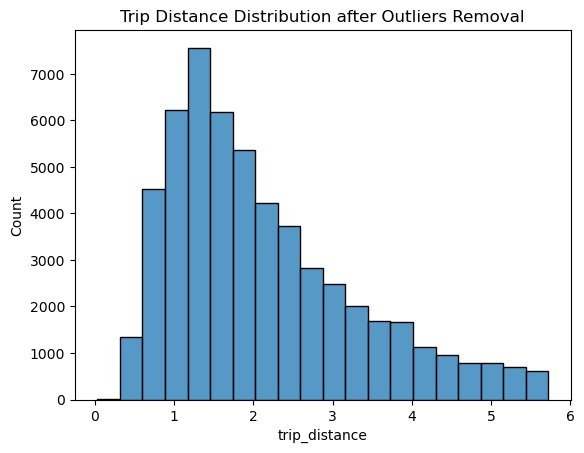

In [52]:
sns.histplot(
    data=df_copy,
    x='trip_distance',
    bins=20
)
plt.title("Trip Distance Distribution after Outliers Removal")
plt.show()

In [53]:
# DISTRIBUTION TEST FOR TRIP DISTANCE 2

stat, pval = shapiro(df_copy['trip_distance'])
print(stat, pval)

# PVALUE = 7.25e-94
# DATA IS NOT NORMALLY DISTRIBUTED

0.9184323581094775 7.253006856489378e-94


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 54791.
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
# LOG TRANSFORMATION (TRIP DISTANCE)

df_copy['trip_distance_log'] = np.log(df_copy['trip_distance'])
df_copy

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/3814662421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['trip_distance_log'] = np.log(df_copy['trip_distance'])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt,trip_distance_log
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,NaN,1.0,24.18,1.0,1.0,2.75,5.78,2.701361,3.860052,0.947789
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,NaN,1.0,15.84,1.0,1.0,0.00,5.91,2.370244,3.271085,0.593327
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,NaN,1.0,10.20,1.0,1.0,0.00,5.00,1.871802,2.549510,0.262364
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,NaN,1.0,8.00,1.0,1.0,0.00,5.45,1.791759,2.449490,0.095310
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,NaN,1.0,22.95,2.0,1.0,2.75,6.37,2.873565,4.207137,1.022451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,NaN,1.0,23.28,NaN,NaN,NaN,4.73,2.750471,3.956008,1.196948
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,NaN,1.0,21.68,NaN,NaN,NaN,6.47,2.682390,3.823611,0.815365
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,NaN,0.3,25.02,NaN,NaN,NaN,5.29,3.031099,4.551923,1.366092
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,1.0,5.41,NaN,NaN,NaN,2.06,1.483875,2.100000,0.760806


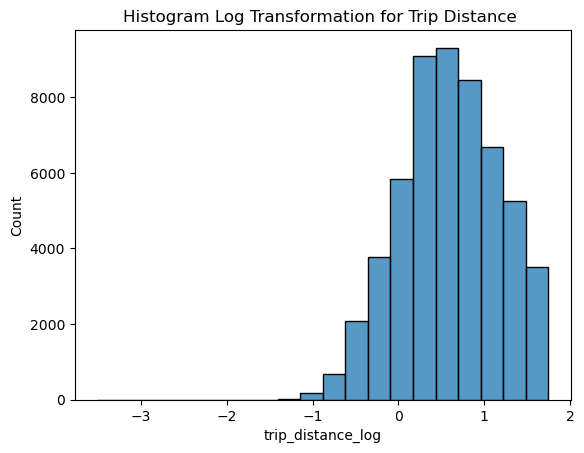

In [55]:
sns.histplot(
    data=df_copy,
    x='trip_distance_log',
    bins=20
)
plt.title("Histogram Log Transformation for Trip Distance ")
plt.show()

In [56]:
# DISTRIBUTION TEST FOR LOG TRANSFORMATION

stat, pval = shapiro(df_copy['trip_distance_log'])
print(stat, pval)

# PVALUE = 1.81e-47
# DATA IS NOT NORMALLY DISTRIBUTED

0.9909083485784997 1.8108986061469828e-47


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 54791.
  res = hypotest_fun_out(*samples, **kwds)


In [57]:
# SQRT TRANSFORMATION (TRIP DISTANCE)

df_copy['trip_distance_sqrt'] = np.sqrt(df_copy['trip_distance'])
df_copy

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/852910824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['trip_distance_sqrt'] = np.sqrt(df_copy['trip_distance'])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt,trip_distance_log,trip_distance_sqrt
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,24.18,1.0,1.0,2.75,5.78,2.701361,3.860052,0.947789,1.606238
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,5.91,2.370244,3.271085,0.593327,1.345362
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,10.20,1.0,1.0,0.00,5.00,1.871802,2.549510,0.262364,1.140175
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,8.00,1.0,1.0,0.00,5.45,1.791759,2.449490,0.095310,1.048809
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,22.95,2.0,1.0,2.75,6.37,2.873565,4.207137,1.022451,1.667333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,1.0,23.28,NaN,NaN,NaN,4.73,2.750471,3.956008,1.196948,1.819341
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,1.0,21.68,NaN,NaN,NaN,6.47,2.682390,3.823611,0.815365,1.503330
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.3,25.02,NaN,NaN,NaN,5.29,3.031099,4.551923,1.366092,1.979899
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.0,5.41,NaN,NaN,NaN,2.06,1.483875,2.100000,0.760806,1.462874


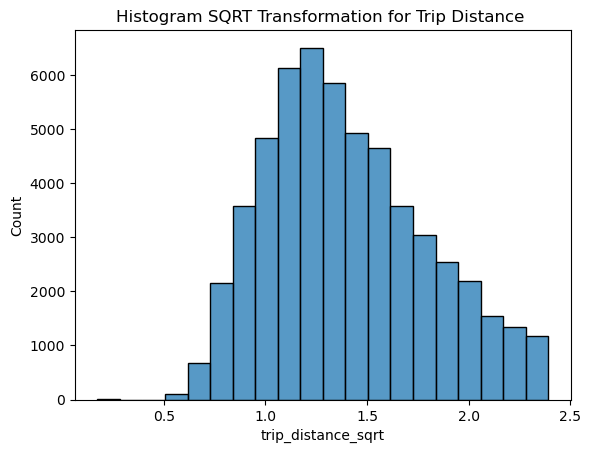

In [58]:
sns.histplot(
    data=df_copy,
    x='trip_distance_sqrt',
    bins=20
)
plt.title("Histogram SQRT Transformation for Trip Distance ")
plt.show()

In [59]:
# DISTRIBUTION TEST FOR SQRT TRANSFORMATION

stat, pval = shapiro(df_copy['trip_distance_sqrt'])
print(stat, pval)

# PVALUE = 9.3e-68
# DATA IS NOT NORMALLY DISTRIBUTED
# USE NON PARAMETRIC TEST

0.9739058985960316 9.303129908659295e-68


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 54791.
  res = hypotest_fun_out(*samples, **kwds)


COMPARISON BETWEEN FARE AMOUNT AND TRIP DISTANCE

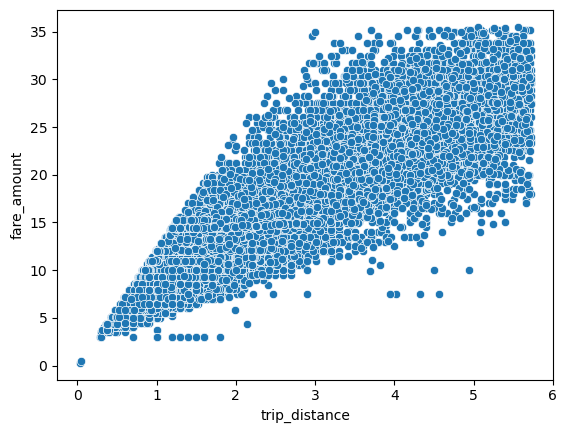

In [60]:
sns.scatterplot(
    data=df_copy,
    x='trip_distance',
    y='fare_amount'
)
plt.show()

In [61]:
# CORRELATION BETWEEN FARE AMOUNT AND TRIP DISTANCE

coef = df_copy[['trip_distance', 'fare_amount']].corr(method='spearman')
print(coef)

# HAVE A STRONG POSITIVE CORRELATION

               trip_distance  fare_amount
trip_distance       1.000000     0.935832
fare_amount         0.935832     1.000000


In [62]:
df_copy.to_csv('Cleaned_NYC_Taxi_Data.csv', index=False)

DATA ANALYSIS

In [63]:
df = pd.read_csv('Cleaned_NYC_Taxi_Data.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt,trip_distance_log,trip_distance_sqrt
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,24.18,1.0,1.0,2.75,5.78,2.701361,3.860052,0.947789,1.606238
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,5.91,2.370244,3.271085,0.593327,1.345362
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,10.20,1.0,1.0,0.00,5.00,1.871802,2.549510,0.262364,1.140175
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,8.00,1.0,1.0,0.00,5.45,1.791759,2.449490,0.095310,1.048809
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,22.95,2.0,1.0,2.75,6.37,2.873565,4.207137,1.022451,1.667333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54786,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,1.0,23.28,NaN,NaN,NaN,4.73,2.750471,3.956008,1.196948,1.819341
54787,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,1.0,21.68,NaN,NaN,NaN,6.47,2.682390,3.823611,0.815365,1.503330
54788,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.3,25.02,NaN,NaN,NaN,5.29,3.031099,4.551923,1.366092,1.979899
54789,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.0,5.41,NaN,NaN,NaN,2.06,1.483875,2.100000,0.760806,1.462874


In [64]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,fare_per_mile,fare_amount_log,fare_amount_sqrt,trip_distance_log,trip_distance_sqrt
count,54791.000000,52148.000000,54791.000000,54791.000000,52148.000000,54791.000000,54791.000000,54791.000000,54791.000000,54791.000000,...,54791.000000,54791.000000,52148.000000,52143.000000,52148.000000,54791.000000,54791.000000,54791.000000,54791.000000,54791.000000
mean,1.878009,1.035092,95.145444,138.945374,1.320530,2.126873,13.554445,0.857486,0.593720,1.921338,...,0.958148,18.440343,1.354760,1.005408,0.741073,6.989912,2.517366,3.601032,0.599138,1.404023
std,0.327278,1.011050,57.562816,77.067318,0.992245,1.191684,5.808071,1.253937,0.352843,2.350620,...,0.166577,7.546935,0.481561,0.073342,1.220101,1.628567,0.425765,0.766175,0.568642,0.394455
min,1.000000,1.000000,3.000000,3.000000,0.000000,0.030000,0.300000,0.000000,0.000000,0.000000,...,0.000000,1.300000,1.000000,1.000000,0.000000,1.640000,-1.203973,0.547723,-3.506558,0.173205
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.230000,9.300000,0.000000,0.500000,0.000000,...,1.000000,12.880000,1.000000,1.000000,0.000000,5.830000,2.230014,3.049590,0.207014,1.109054
50%,2.000000,1.000000,75.000000,140.000000,1.000000,1.810000,12.100000,0.000000,0.500000,1.850000,...,1.000000,17.000000,1.000000,1.000000,0.000000,6.740000,2.493205,3.478505,0.593327,1.345362
75%,2.000000,1.000000,97.000000,223.000000,1.000000,2.780000,17.000000,1.000000,0.500000,3.210000,...,1.000000,22.980000,2.000000,1.000000,2.750000,7.910000,2.833213,4.123106,1.022451,1.667333
max,2.000000,99.000000,265.000000,265.000000,6.000000,5.720000,35.500000,12.500000,1.500000,222.220000,...,1.000000,232.720000,4.000000,2.000000,2.750000,12.220000,3.569533,5.958188,1.743969,2.391652


THE SCALE OF OPERATION

In [65]:
# TOTAL TRIPS, TOTAL REVENUE, TOTAL DISTANCE, & THEIR METRICS
trips = len(df)
revenue = round(df['fare_amount'].sum(), 2)
avg_fare = round(df['fare_amount'].mean(), 2)
distance = df['trip_distance'].sum()
avg_dist = round(df['trip_distance'].mean(), 2)

print(f"Total trips in one month : {trips} Trips")
print(f"Total revenue in one month : ${revenue}, with an average of ${avg_fare}")
print(f"Total distance in one month : {distance} miles, with an average distance of {avg_dist}")

Total trips in one month : 54791 Trips
Total revenue in one month : $742661.6, with an average of $13.55
Total distance in one month : 116533.49 miles, with an average distance of 2.13


In [66]:
# TRIP DISTANCE CATEGORIZE
# MIN = 0 MILES, MAX = 4.8 MILES 

bins = [0, 2, 4, 6]
labels = ['Short', 'Medium', 'Long']
df['distance_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

trip_counts = df['distance_category'].value_counts()
print(trip_counts)

distance_category
Short     30915
Medium    18854
Long       5022
Name: count, dtype: int64


REVENUE BY DISTANCE

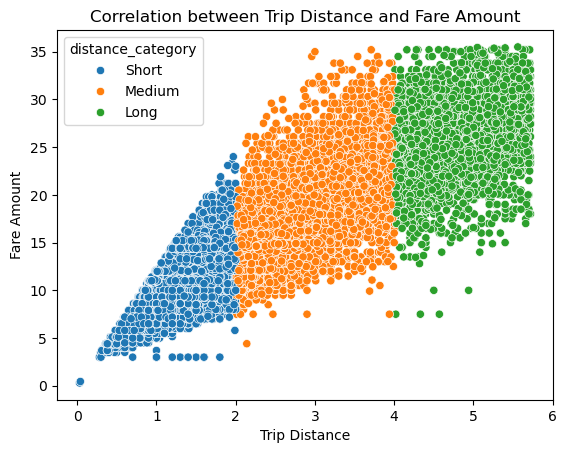

In [67]:
sns.scatterplot(
    data=df,
    x='trip_distance',
    y='fare_amount',
    hue='distance_category',
    legend=True
)
plt.title("Correlation between Trip Distance and Fare Amount")
plt.xlabel('Trip Distance')
plt.ylabel("Fare Amount")
plt.show()

In [68]:
revenue_cat = df.groupby('distance_category')['fare_amount'].sum()
print("Revenue by distance category : ")
revenue_cat

Revenue by distance category : 


/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/601261849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_cat = df.groupby('distance_category')['fare_amount'].sum()


distance_category
Short     298466.91
Medium    320908.53
Long      123286.16
Name: fare_amount, dtype: float64

In [69]:
# STATISTICAL TEST

from scipy.stats import kruskal
kruskal(
    df[df['distance_category']=='Short']['fare_amount'],
    df[df['distance_category']=='Medium']['fare_amount'],
    df[df['distance_category']=='Long']['fare_amount']
)

# H0 : SHORT = MEDIUM = LONG
# HA : ADA SATU PASANG YANG TIDAK SAMA

# P VALUE = 0.0
# P VALUE < 0.05 : H0 DITOLAK, TERDAPAT PERBEDAAN YANG SIGNIFIKAN PADA TARIF HARGA ANTAR KATEGORI JARAK

KruskalResult(statistic=37563.10075589562, pvalue=0.0)

PEAK DEMAND ANALYSIS

In [70]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['month'] = df['lpep_pickup_datetime'].dt.month
df['week'] = df['lpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['date'] = df['lpep_pickup_datetime'].dt.day

df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,fare_per_mile,fare_amount_log,fare_amount_sqrt,trip_distance_log,trip_distance_sqrt,distance_category,month,week,hour,date
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,5.78,2.701361,3.860052,0.947789,1.606238,Medium,1,6,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,5.91,2.370244,3.271085,0.593327,1.345362,Short,1,6,0,1
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,5.00,1.871802,2.549510,0.262364,1.140175,Short,1,6,0,1
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,5.45,1.791759,2.449490,0.095310,1.048809,Short,1,6,0,1
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,6.37,2.873565,4.207137,1.022451,1.667333,Medium,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54786,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,4.73,2.750471,3.956008,1.196948,1.819341,Medium,1,1,20,31
54787,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,6.47,2.682390,3.823611,0.815365,1.503330,Medium,1,1,21,31
54788,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,5.29,3.031099,4.551923,1.366092,1.979899,Medium,1,1,21,31
54789,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,2.06,1.483875,2.100000,0.760806,1.462874,Medium,1,1,22,31


In [71]:
bins = [0, 3, 6, 12, 18, 24]
labels = ['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Night']

df['time_category'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,fare_amount_log,fare_amount_sqrt,trip_distance_log,trip_distance_sqrt,distance_category,month,week,hour,date,time_category
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.701361,3.860052,0.947789,1.606238,Medium,1,6,0,1,Midnight
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,2.370244,3.271085,0.593327,1.345362,Short,1,6,0,1,Midnight
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.871802,2.549510,0.262364,1.140175,Short,1,6,0,1,Midnight
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.791759,2.449490,0.095310,1.048809,Short,1,6,0,1,Midnight
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,2.873565,4.207137,1.022451,1.667333,Medium,1,6,0,1,Midnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54786,2,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,NaN,3.31,15.65,...,2.750471,3.956008,1.196948,1.819341,Medium,1,1,20,31,Night
54787,2,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,NaN,2.26,14.62,...,2.682390,3.823611,0.815365,1.503330,Medium,1,1,21,31,Night
54788,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,3.031099,4.551923,1.366092,1.979899,Medium,1,1,21,31,Night
54789,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.483875,2.100000,0.760806,1.462874,Medium,1,1,22,31,Night


In [72]:
# HOURLY TRENDS

hourly_trends = df.groupby('time_category').agg(
    total_rides=('trip_distance', 'count'),
    average_fare=('fare_amount', 'mean'),
    total_revenue=('fare_amount', 'sum')
).reset_index()
hourly_trends

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_701/1281973983.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trends = df.groupby('time_category').agg(


,time_category,total_rides,average_fare,total_revenue
0,Midnight,1930,13.320632,25708.82
1,Early Morning,893,14.128835,12617.05
2,Morning,14077,13.643834,192064.25
3,Afternoon,22390,13.904601,311324.02
4,Night,15501,12.963516,200947.46


In [73]:
# STATISTICAL TEST

from scipy.stats import chi2_contingency

category_counts = df['time_category'].value_counts().sort_index()
observed_frequencies = category_counts.values

total_rides = observed_frequencies.sum()
expected_frequencies = [total_rides / len(labels)] * len(labels)

chi2_contingency([observed_frequencies, expected_frequencies])

# H0 : the two groups have no significant difference.
# P VALUE = 0.0 
# H0 Ditolak, This means there is a strong statistical difference in the proportions of rides among the time categories.

Chi2ContingencyResult(statistic=19959.93906193872, pvalue=0.0, dof=4, expected_freq=array([[ 6444.1,  5925.6, 12517.6, 16674.1, 13229.6],
       [ 6444.1,  5925.6, 12517.6, 16674.1, 13229.6]]))

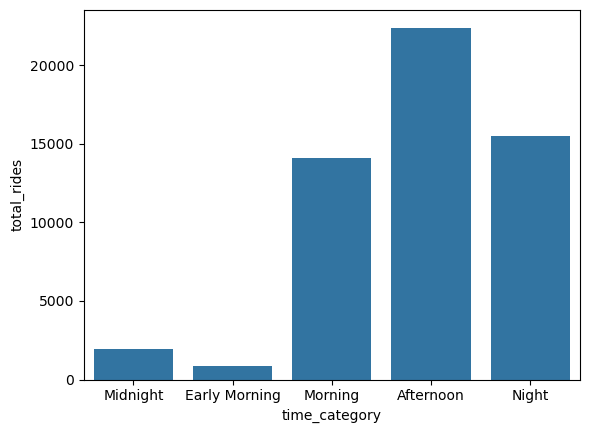

In [74]:
# TIME CATEGORY AND TOTAL RIDES ANALYSIS

sns.barplot(
    data=hourly_trends,
    x='time_category',
    y='total_rides'
)
plt.show()

In [75]:
# AFTERNOON TIME ANALYSIS
afternoon = df[df['time_category']=='Afternoon'][['hour']]
afternoon = afternoon.groupby('hour').agg(
    count = ('hour', 'count')
)
afternoon

,count
hour,
12,2972
13,3142
14,3467
15,4159
16,4311
17,4339


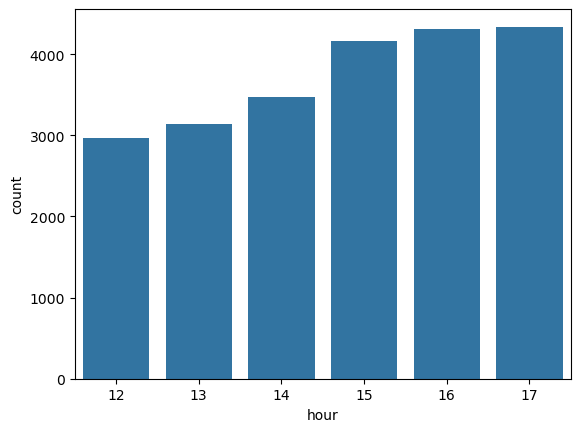

In [76]:
sns.barplot(
    data=afternoon,
    x='hour',
    y='count'
)
plt.show()

In [77]:
night = df[df['time_category']=='Night'][['hour']]
night = night.groupby('hour').agg(
    count = ('hour', 'count')
)
night

,count
hour,
18,4447
19,3598
20,2691
21,1997
22,1551
23,1217


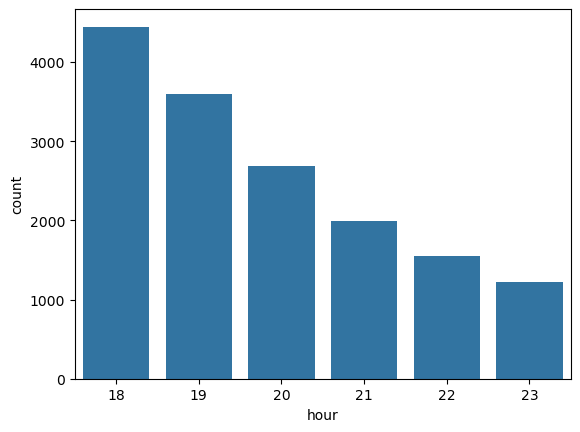

In [78]:
sns.barplot(
    data=night,
    x='hour',
    y='count'
)
plt.show()

MAPPING TAXI HOTSPOTS

In [79]:
# LOAD DATA ZONE

zone = pd.read_csv('taxi_zone_lookup.csv')
zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [80]:
# IDENTIFYING PICK UP HOTSPOTS

pickup = df.groupby('PULocationID').agg(
    total_rides = ('fare_amount', 'count'),
    average_fare = ('fare_amount', 'mean'),
    average_distance = ('trip_distance', 'mean')
).reset_index()
pickup

,PULocationID,total_rides,average_fare,average_distance
0,3,2,8.600000,1.120000
1,7,1431,13.122991,2.041083
2,9,6,20.318333,2.928333
3,10,6,11.935000,2.536667
4,14,3,16.740000,2.710000
...,...,...,...,...
174,260,1187,14.337043,2.353252
175,262,1,14.900000,3.270000
176,263,63,13.234921,2.142222
177,264,15,14.353333,2.563333


In [82]:
# PROPORTION TEST

category_counts = df['PULocationID'].value_counts().sort_index()
observed_frequencies = category_counts.values

total_rides = observed_frequencies.sum()
expected_frequencies = [total_rides / len(category_counts)] * len(category_counts)

chi2_stat, p_value, dof, expected = chi2_contingency([observed_frequencies, expected_frequencies])
print(chi2_stat, p_value, dof, expected)

# P VALUE = 0.0 
# This means there is a strong statistical difference in the proportions of rides among the time categories.

72557.03573674314 0.0 178 [[ 154.04748603  868.54748603  156.04748603  156.04748603  154.54748603
   154.54748603  186.54748603  157.04748603  163.04748603  157.04748603
   154.04748603  369.54748603  333.04748603  157.54748603  153.54748603
   160.54748603  161.04748603  154.54748603  390.04748603  155.54748603
   158.04748603  196.54748603  171.04748603  155.04748603  173.04748603
  1878.54748603  856.54748603 1448.54748603  171.04748603  188.04748603
   154.54748603  223.54748603  156.54748603  157.04748603  177.04748603
   165.04748603  154.04748603  153.54748603  157.04748603  219.04748603
   165.04748603  154.04748603  758.04748603  378.54748603  181.54748603
   172.04748603  157.54748603  158.54748603  156.04748603 6227.54748603
  4145.04748603  162.04748603  154.04748603  161.04748603  190.04748603
   155.04748603 1374.04748603  334.04748603  159.54748603  163.54748603
   158.04748603  366.54748603  157.54748603  157.04748603 1765.04748603
  1100.04748603  154.54748603  157.547

In [83]:
# PUT ZONE NAME 

pickup = pickup.merge(zone, left_on='PULocationID', right_on='LocationID', how='left')
pickup

,PULocationID,total_rides,average_fare,average_distance,LocationID,Borough,Zone,service_zone
0,3,2,8.600000,1.120000,3,Bronx,Allerton/Pelham Gardens,Boro Zone
1,7,1431,13.122991,2.041083,7,Queens,Astoria,Boro Zone
2,9,6,20.318333,2.928333,9,Queens,Auburndale,Boro Zone
3,10,6,11.935000,2.536667,10,Queens,Baisley Park,Boro Zone
4,14,3,16.740000,2.710000,14,Brooklyn,Bay Ridge,Boro Zone
...,...,...,...,...,...,...,...,...
174,260,1187,14.337043,2.353252,260,Queens,Woodside,Boro Zone
175,262,1,14.900000,3.270000,262,Manhattan,Yorkville East,Yellow Zone
176,263,63,13.234921,2.142222,263,Manhattan,Yorkville West,Yellow Zone
177,264,15,14.353333,2.563333,264,Unknown,NaN,NaN


In [84]:
# ADD LATITUDE AND LONGITUDE

import geopandas as gdp
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [383]:
geolocator = Nominatim(user_agent="geoapi")

def get_lat_lon(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [384]:
pickup[['Latitude', 'Longitude']] = pickup['Borough'].apply(
    lambda x: pd.Series(get_lat_lon(x)))
pickup

,PULocationID,total_rides,average_fare,average_distance,LocationID,Borough,Zone,service_zone,Latitude,Longitude
0,3,2,8.600000,1.120000,3,Bronx,Allerton/Pelham Gardens,Boro Zone,40.846651,-73.878594
1,7,1431,13.122991,2.041083,7,Queens,Astoria,Boro Zone,40.713508,-73.828313
2,9,6,20.318333,2.928333,9,Queens,Auburndale,Boro Zone,40.713508,-73.828313
3,10,6,11.935000,2.536667,10,Queens,Baisley Park,Boro Zone,40.713508,-73.828313
4,14,3,16.740000,2.710000,14,Brooklyn,Bay Ridge,Boro Zone,40.652601,-73.949721
...,...,...,...,...,...,...,...,...,...,...
174,260,1187,14.337043,2.353252,260,Queens,Woodside,Boro Zone,40.713508,-73.828313
175,262,1,14.900000,3.270000,262,Manhattan,Yorkville East,Yellow Zone,40.789624,-73.959894
176,263,63,13.234921,2.142222,263,Manhattan,Yorkville West,Yellow Zone,40.789624,-73.959894
177,264,15,14.353333,2.563333,264,Unknown,NaN,NaN,26.492533,92.330879


In [386]:
pickup.to_csv('pickup_zone.csv', index=False)

In [387]:
# 25 TOP PICK UP LOCATION

pickup_top = pickup.sort_values(by='total_rides', ascending=False).head(25)

pickup_top

,PULocationID,total_rides,average_fare,average_distance,LocationID,Borough,Zone,service_zone,Latitude,Longitude
49,74,12149,13.176637,2.059667,74,Manhattan,East Harlem North,Boro Zone,40.789624,-73.959894
50,75,7984,12.384718,1.892430,75,Manhattan,East Harlem South,Boro Zone,40.789624,-73.959894
25,41,3451,12.134700,1.811275,41,Manhattan,Central Harlem,Boro Zone,40.789624,-73.959894
105,166,3418,13.242692,2.031542,166,Manhattan,Morningside Heights,Boro Zone,40.789624,-73.959894
64,95,3224,13.031464,2.002978,95,Queens,Forest Hills,Boro Zone,40.713508,-73.828313
27,43,2591,13.217511,1.995739,43,Manhattan,Central Park,Yellow Zone,40.789624,-73.959894
56,82,2442,14.541486,2.377891,82,Queens,Elmhurst,Boro Zone,40.713508,-73.828313
65,97,1894,15.342233,2.195924,97,Brooklyn,Fort Greene,Boro Zone,40.652601,-73.949721
1,7,1431,13.122991,2.041083,7,Queens,Astoria,Boro Zone,40.713508,-73.828313
26,42,1407,12.397797,1.897889,42,Manhattan,Central Harlem North,Boro Zone,40.789624,-73.959894


In [388]:
# LEAST PICK UP ZONE

pickup_least = pickup.sort_values(by='total_rides', ascending=True).head(25)

pickup_least

,PULocationID,total_rides,average_fare,average_distance,LocationID,Borough,Zone,service_zone,Latitude,Longitude
133,203,1,17.700,3.460,203,Queens,Rosedale,Boro Zone,40.713508,-73.828313
131,201,1,17.870,2.980,201,Queens,Rockaway Park,Boro Zone,40.713508,-73.828313
14,27,1,7.200,1.270,27,Queens,Breezy Point/Fort Tilden/Riis Beach,Boro Zone,40.713508,-73.828313
37,58,1,22.100,3.190,58,Bronx,Country Club,Boro Zone,40.846651,-73.878594
71,114,1,15.600,2.490,114,Manhattan,Greenwich Village South,Yellow Zone,40.789624,-73.959894
136,207,1,7.900,1.120,207,Queens,Saint Michaels Cemetery/Woodside,Boro Zone,40.713508,-73.828313
147,221,1,13.000,1.850,221,Staten Island,Stapleton,Boro Zone,40.583456,-74.149605
144,218,1,22.600,5.000,218,Queens,Springfield Gardens North,Boro Zone,40.713508,-73.828313
156,240,1,26.030,3.870,240,Bronx,Van Cortlandt Park,Boro Zone,40.846651,-73.878594
161,245,1,6.500,0.840,245,Staten Island,West Brighton,Boro Zone,40.583456,-74.149605


In [389]:
# IDENTIFYING DROP OFF HOTSPOTS

dropoff = df.groupby('DOLocationID').agg(
    total_rides = ('fare_amount', 'count'),
    average_fare = ('fare_amount', 'mean'),
    average_trip = ('trip_distance', 'mean')
).reset_index()
dropoff

,DOLocationID,total_rides,average_fare,average_trip
0,3,3,16.286667,2.476667
1,4,34,22.757059,4.663824
2,7,900,11.605044,1.706311
3,8,2,13.150000,2.335000
4,9,18,19.706667,3.636111
...,...,...,...,...
233,261,26,16.045385,2.798462
234,262,827,14.122854,2.200121
235,263,1468,12.245586,1.882473
236,264,48,13.246667,2.246250


In [390]:
# PROPORTION TEST

category_counts = df['DOLocationID'].value_counts().sort_index()
observed_frequencies = category_counts.values

total_rides = observed_frequencies.sum()
expected_frequencies = [total_rides / len(category_counts)] * len(category_counts)

chi2_stat, p_value, dof, expected = stats.chi2_contingency([observed_frequencies, expected_frequencies])
print(chi2_stat, p_value, dof, expected)

# P VALUE = 0.0 
# This means there is a strong statistical difference in the proportions of rides among the time categories.

47794.56298157868 0.0 237 [[ 116.60714286  132.10714286  565.10714286  116.10714286  124.10714286
   182.60714286  115.60714286  115.60714286  126.60714286  123.60714286
   118.10714286  122.10714286  256.60714286  123.60714286  116.10714286
   129.10714286  120.60714286  118.10714286  443.60714286  195.10714286
   122.10714286  307.10714286  124.60714286  115.60714286  117.10714286
   216.60714286  127.60714286  126.60714286  145.60714286  177.60714286
   118.60714286  119.10714286  192.60714286 1280.60714286 1170.60714286
   708.60714286  127.60714286  137.60714286  254.10714286  381.10714286
   163.60714286  117.10714286  153.60714286  160.60714286  147.60714286
   134.10714286  286.10714286  122.10714286  115.60714286  126.60714286
   328.10714286  166.10714286  126.10714286  182.60714286  178.10714286
   117.60714286  161.10714286  196.10714286  220.10714286  135.60714286
   130.10714286  136.60714286 1627.10714286 1669.10714286  124.60714286
   117.10714286  130.10714286  165.607

In [391]:
# PUT ZONE NAME

dropoff = dropoff.merge(zone, left_on='DOLocationID', right_on='LocationID', how='left')
dropoff

,DOLocationID,total_rides,average_fare,average_trip,LocationID,Borough,Zone,service_zone
0,3,3,16.286667,2.476667,3,Bronx,Allerton/Pelham Gardens,Boro Zone
1,4,34,22.757059,4.663824,4,Manhattan,Alphabet City,Yellow Zone
2,7,900,11.605044,1.706311,7,Queens,Astoria,Boro Zone
3,8,2,13.150000,2.335000,8,Queens,Astoria Park,Boro Zone
4,9,18,19.706667,3.636111,9,Queens,Auburndale,Boro Zone
...,...,...,...,...,...,...,...,...
233,261,26,16.045385,2.798462,261,Manhattan,World Trade Center,Yellow Zone
234,262,827,14.122854,2.200121,262,Manhattan,Yorkville East,Yellow Zone
235,263,1468,12.245586,1.882473,263,Manhattan,Yorkville West,Yellow Zone
236,264,48,13.246667,2.246250,264,Unknown,NaN,NaN


In [392]:
dropoff[['Latitude', 'Longitude']] = dropoff['Borough'].apply(
    lambda x: pd.Series(get_lat_lon(x)))
dropoff

,DOLocationID,total_rides,average_fare,average_trip,LocationID,Borough,Zone,service_zone,Latitude,Longitude
0,3,3,16.286667,2.476667,3,Bronx,Allerton/Pelham Gardens,Boro Zone,40.846651,-73.878594
1,4,34,22.757059,4.663824,4,Manhattan,Alphabet City,Yellow Zone,40.789624,-73.959894
2,7,900,11.605044,1.706311,7,Queens,Astoria,Boro Zone,40.713508,-73.828313
3,8,2,13.150000,2.335000,8,Queens,Astoria Park,Boro Zone,40.713508,-73.828313
4,9,18,19.706667,3.636111,9,Queens,Auburndale,Boro Zone,40.713508,-73.828313
...,...,...,...,...,...,...,...,...,...,...
233,261,26,16.045385,2.798462,261,Manhattan,World Trade Center,Yellow Zone,40.789624,-73.959894
234,262,827,14.122854,2.200121,262,Manhattan,Yorkville East,Yellow Zone,40.789624,-73.959894
235,263,1468,12.245586,1.882473,263,Manhattan,Yorkville West,Yellow Zone,40.789624,-73.959894
236,264,48,13.246667,2.246250,264,Unknown,NaN,NaN,26.492533,92.330879


In [393]:
dropoff.to_csv('dropoff_zone.csv', index=False)

In [394]:
# 25 TOP & LEAST DROP OFF LOCATION

dropoff_top = dropoff.sort_values(by='total_rides', ascending=False).head(25)
dropoff_top

,DOLocationID,total_rides,average_fare,average_trip,LocationID,Borough,Zone,service_zone,Latitude,Longitude
63,75,3108,10.041715,1.401445,75,Manhattan,East Harlem South,Boro Zone,40.789624,-73.959894
62,74,3024,9.323690,1.313638,74,Manhattan,East Harlem North,Boro Zone,40.789624,-73.959894
209,236,2568,11.817835,1.750604,236,Manhattan,Upper East Side North,Yellow Zone,40.789624,-73.959894
33,41,2331,8.938168,1.184359,41,Manhattan,Central Harlem,Boro Zone,40.789624,-73.959894
211,238,2271,12.742977,2.025500,238,Manhattan,Upper West Side North,Yellow Zone,40.789624,-73.959894
145,166,2116,11.130340,1.580666,166,Manhattan,Morningside Heights,Boro Zone,40.789624,-73.959894
34,42,2111,10.425917,1.511492,42,Manhattan,Central Harlem North,Boro Zone,40.789624,-73.959894
235,263,1468,12.245586,1.882473,263,Manhattan,Yorkville West,Yellow Zone,40.789624,-73.959894
212,239,1443,15.877311,2.712751,239,Manhattan,Upper West Side South,Yellow Zone,40.789624,-73.959894
130,151,1406,11.609189,1.735477,151,Manhattan,Manhattan Valley,Yellow Zone,40.789624,-73.959894


In [395]:
# DROP OFF LEAST

dropoff_least = dropoff.sort_values(by='total_rides', ascending=True).head(25)
dropoff_least

,DOLocationID,total_rides,average_fare,average_trip,LocationID,Borough,Zone,service_zone,Latitude,Longitude
163,187,1,25.400000,5.520000,187,Staten Island,Port Richmond,Boro Zone,40.572427,-74.145201
48,58,1,19.470000,2.570000,58,Bronx,Country Club,Boro Zone,40.846651,-73.878594
176,201,1,17.960000,3.100000,201,Queens,Rockaway Park,Boro Zone,40.713508,-73.828313
23,31,1,32.670000,4.680000,31,Bronx,Bronx Park,Boro Zone,40.846651,-73.878594
135,156,1,26.100000,5.100000,156,Staten Island,Mariners Harbor,Boro Zone,40.572427,-74.145201
97,117,1,17.870000,2.980000,117,Queens,Hammels/Arverne,Boro Zone,40.713508,-73.828313
7,12,1,14.900000,2.710000,12,Manhattan,Battery Park,Yellow Zone,40.789624,-73.959894
194,221,1,7.200000,0.780000,221,Staten Island,Stapleton,Boro Zone,40.572427,-74.145201
95,115,1,13.000000,1.850000,115,Staten Island,Grymes Hill/Clifton,Boro Zone,40.572427,-74.145201
91,111,1,16.300000,3.360000,111,Brooklyn,Green-Wood Cemetery,Boro Zone,40.652601,-73.949721


In [396]:
# PAYMENT TYPE

pay_type = df_copy.groupby('payment_type').agg(
    total_revenue = ('fare_amount','sum'),
    avg_fare = ('fare_amount', 'mean'),
    trip = ('fare_amount', 'count')
).reset_index()
pay_type

,payment_type,total_revenue,avg_fare,trip
0,1.0,455226.62,13.508208,33700
1,2.0,238559.20,12.949691,18422
2,4.0,251.70,9.680769,26


In [397]:
# PROPORTION TEST (USER PROPORTION DIFFERENCE)

category_counts = df['payment_type'].value_counts().sort_index()
observed_frequencies = category_counts.values

total_rides = observed_frequencies.sum()
expected_frequencies = [total_rides / len(category_counts)] * len(category_counts)

chi2_stat, p_value, dof, expected = stats.chi2_contingency([observed_frequencies, expected_frequencies])
print(chi2_stat, p_value, dof, expected)

# P VALUE = 0.0 
# This means there is a strong statistical difference in the proportions of rides among the time categories.

22547.236494793422 0.0 2 [[25541.33333333 17902.33333333  8704.33333333]
 [25541.33333333 17902.33333333  8704.33333333]]


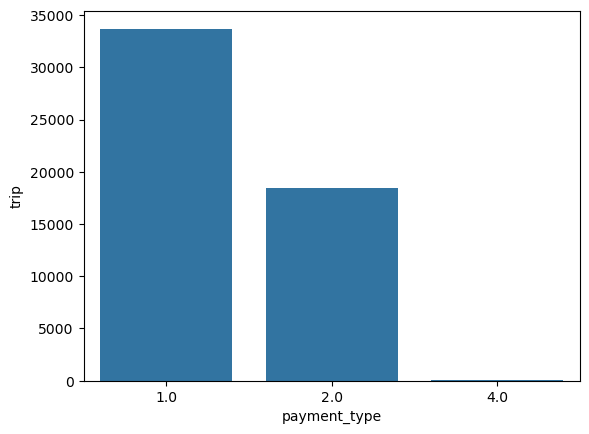

In [400]:
sns.barplot(
    data=pay_type,
    x='payment_type',
    y='trip'
)
plt.show()

In [401]:
# TRIP TYPE

trip_type = df_copy.groupby('trip_type').agg(
    total_revenue = ('fare_amount','sum'),
    avg_fare = ('fare_amount', 'mean'),
    trip = ('fare_amount', 'count')
).reset_index()
trip_type

,trip_type,total_revenue,avg_fare,trip
0,1.0,689092.82,13.287303,51861
1,2.0,4850.10,17.198936,282


In [402]:
# PROPORTION TEST (USER PROPORTION DIFFERENCE)

category_counts = df['trip_type'].value_counts().sort_index()
observed_frequencies = category_counts.values

total_rides = observed_frequencies.sum()
expected_frequencies = [total_rides / len(category_counts)] * len(category_counts)

chi2_stat, p_value, dof, expected = stats.chi2_contingency([observed_frequencies, expected_frequencies])
print(chi2_stat, p_value, dof, expected)

# P VALUE = 0.0 
# This means there is a strong statistical difference in the proportions of rides among the time categories.

33769.23821665742 0.0 1 [[38966.25 13176.75]
 [38966.25 13176.75]]


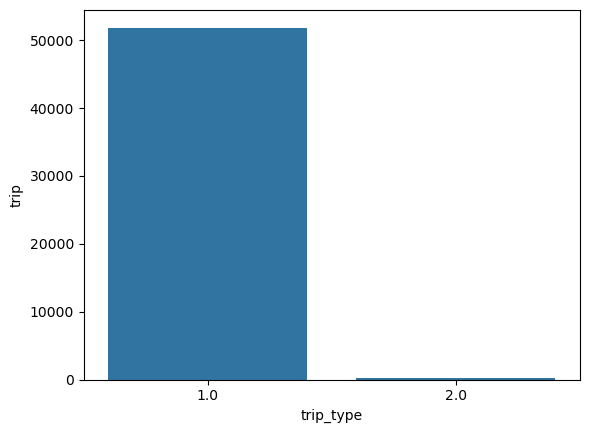

In [403]:
sns.barplot(
    data=trip_type,
    x='trip_type',
    y='trip'
)
plt.show()

In [412]:
df.to_csv("final_data_NYC.csv", index=False)

TAXI HOTSPOTS

In [435]:
import folium
from folium.plugins import HeatMap

In [46]:
pickup = pd.read_csv("pickup_zone.csv")

In [47]:
map_taxi = pickup.groupby('Borough')['total_rides'].sum().reset_index()
map_taxi

,Borough,total_rides
0,Bronx,630
1,Brooklyn,6417
2,Manhattan,34102
3,Queens,13617
4,Staten Island,8
5,Unknown,15


In [48]:
map_taxi = map_taxi[map_taxi['Borough'] != 'Unknown']

In [49]:
map_taxi['Latitude'] = [40.837048, 40.650002, 40.776676, 40.742054, 40.579021]
map_taxi['Longitude'] = [-73.865433, -73.949997, -73.971321, -73.769417, -74.151535]

map_taxi

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/3233424068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_taxi['Latitude'] = [40.837048, 40.650002, 40.776676, 40.742054, 40.579021]
/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/3233424068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_taxi['Longitude'] = [-73.865433, -73.949997, -73.971321, -73.769417, -74.151535]


,Borough,total_rides,Latitude,Longitude
0,Bronx,630,40.837048,-73.865433
1,Brooklyn,6417,40.650002,-73.949997
2,Manhattan,34102,40.776676,-73.971321
3,Queens,13617,40.742054,-73.769417
4,Staten Island,8,40.579021,-74.151535


In [50]:
map_taxi['Latitude'] = pd.to_numeric(map_taxi['Latitude'], errors='coerce')
map_taxi['Longitude'] = pd.to_numeric(map_taxi['Longitude'], errors='coerce')
map_taxi['total_rides'] = pd.to_numeric(map_taxi['total_rides'], errors='coerce')

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/1181124888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_taxi['Latitude'] = pd.to_numeric(map_taxi['Latitude'], errors='coerce')
/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/1181124888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_taxi['Longitude'] = pd.to_numeric(map_taxi['Longitude'], errors='coerce')
/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/1181124888.py:3: SettingWithCopyWarning: 
A

In [51]:
map_taxi.dropna(subset=['Latitude', 'Longitude', 'total_rides'], inplace=True)

map_taxi.to_csv('Map_Taxi.csv')

/var/folders/yz/_8hgp1q92_9_nnhzpzfy6b180000gn/T/ipykernel_803/2981946084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_taxi.dropna(subset=['Latitude', 'Longitude', 'total_rides'], inplace=True)


In [73]:
new_york = (40.73426152, -73.99039511) # lat, long
m = Map(new_york, zoom_start=11, tiles="CartoDB Positron")

m

In [55]:
from folium.plugins import MarkerCluster
import branca.colormap as cm
from folium.features import DivIcon

In [74]:
min_rides, max_rides = map_taxi["total_rides"].min(), map_taxi["total_rides"].max()
colormap = cm.LinearColormap(colors=["lightblue", "orange", "red"], vmin=min_rides, vmax=max_rides, caption="Total Rides")

# Add circle markers with colors based on total rides
for _, row in map_taxi.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=15,
        color=None,
        fill=True,
        fill_color=colormap(row["total_rides"]),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['Borough']} : {row['total_rides']} Rides", parse_html=True)
    ).add_to(m)

    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        icon=DivIcon(
            icon_size=(50, 25),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12px; color: black; text-align: center; 
            white-space: nowrap;">{row["Borough"]} : {row['total_rides']} Rides</div>',
        ),
    ).add_to(m)

m


In [75]:
m.save('map.html')